In [1]:
import openeo

# connect with the backend
eoconn = openeo.connect("openeofed.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [2]:
minx, miny, maxx, maxy = (
    15.179421073198585,
    45.80924633589998,
    15.185336903822831,
    45.81302555710934,
)
spat_ext = dict(west=minx, east=maxx, north=maxy, south=miny, crs=4326)

temp_ext = ["2021-01-01", "2021-12-31"]

drop_thr = 0.15  # Threshold value for the amplitude of the drop in the input feature
rec_r = 1.0  # Threshold value for the amplitude of the recovery, relative to the `drop_delta`
slope_thr = 0.007  # Threshold value for the slope where the peak should start

In [3]:
# Create a processing graph from the Peak/Valley process using an active openEO connection
peakvalley = eoconn.datacube_from_process(
    "peakvalley",
    namespace="https://raw.githubusercontent.com/VITObelgium/openeo_algorithm_catalog/refs/heads/main/peakvalley/openeo_udp/peakvalley.json",
    spatial_extent=spat_ext,
    temporal_extent=temp_ext,
    drop_threshold=drop_thr,
    recovery_ratio=rec_r,
    slope_threshold=slope_thr,
)

In [4]:
peakvalley_job = peakvalley.create_job(
    title="Peak Valley Detection", out_format="GTiff"
)
peakvalley_job.start_and_wait()

0:00:00 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': send 'start'
0:00:15 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': created (progress 0%)
0:00:20 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': created (progress 0%)
0:00:27 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:00:35 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:00:45 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:00:57 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:01:13 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:01:32 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:01:56 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:02:26 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:03:03 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A)
0:03:50 Job 'cdse-j-2512121317494d02935eaba8d1e23d5e': running (progress N/A

<BatchJob job_id='cdse-j-2512121317494d02935eaba8d1e23d5e'>

In [5]:
results = peakvalley_job.get_results()
results.download_files("output/peakvalley/")

[PosixPath('output/peakvalley/openEO_2021-02-14Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-02-24Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-02-26Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-03-01Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-03-03Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-03-06Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-03-08Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-03-21Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-03-26Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-03-31Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-04-05Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-04-15Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-04-22Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-05-05Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-05-10Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-05-15Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-05-20Z.tif'),
 PosixPath('output/peakvalley/openEO_2021-05-25Z

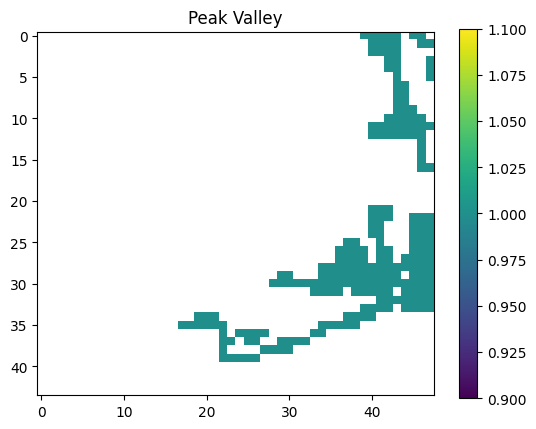

In [6]:
import rasterio
import matplotlib.pyplot as plt

img = rasterio.open("output/peakvalley/openEO_2021-02-14Z.tif")
# plot the first band
plt.imshow(img.read(1))
plt.colorbar()
plt.title("Peak Valley")
plt.show()